# Выравнивание изображения

Чтобы сеть лучше извлекала фичи из изображения лица, его нужно выровнять.

In [10]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
from project.dg_face import utils, detection

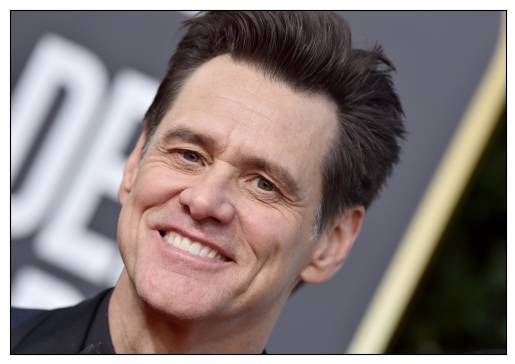

In [11]:
img = utils.load_image("carrey.jpg")
# img = utils.load_image("belikov.jpg")
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.grid(None)
plt.show()

## Без выравнивания

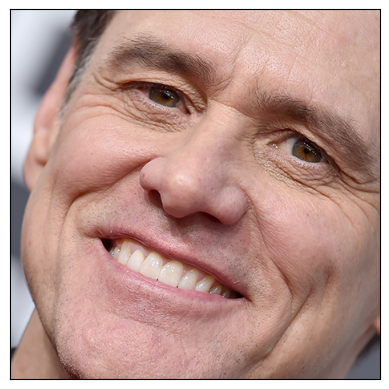

In [12]:
face = detection.detect_faces(img)[0]
ar = np.ascontiguousarray(img[face.top(): face.bottom(), face.left(): face.right()])
plt.imshow(ar)
plt.xticks([])
plt.yticks([])
plt.grid(None)
plt.show()

## С выравниванием

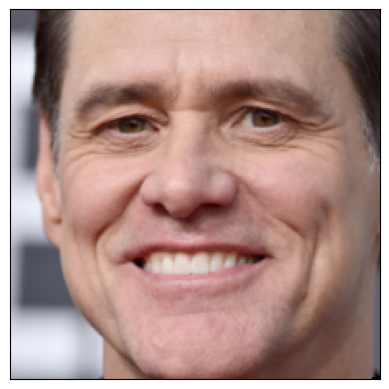

In [13]:
faces = detection.detect_faces(img)
sp = dlib.shape_predictor('../utils/shape_predictor_5_face_landmarks.dat')

with_landmarks = dlib.full_object_detections()
for detection in faces:
    with_landmarks.append(sp(img, detection))

image = dlib.get_face_chip(img, with_landmarks[0], size=224)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(None)
plt.show()